# PROBLEM STATEMENT :
Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.


In [ ]:
# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [ ]:
# UPLOAD THE DATASET

In [12]:
data = pd.read_csv(r'C:\Users\Admin\Desktop\drug200.csv')

In [ ]:
# Understanding Data

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(200, 6)

In [15]:
data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [16]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [17]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [19]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
# EXPLORATORY DATA ANALYSIS

# CountPlot

<Axes: xlabel='Drug', ylabel='count'>

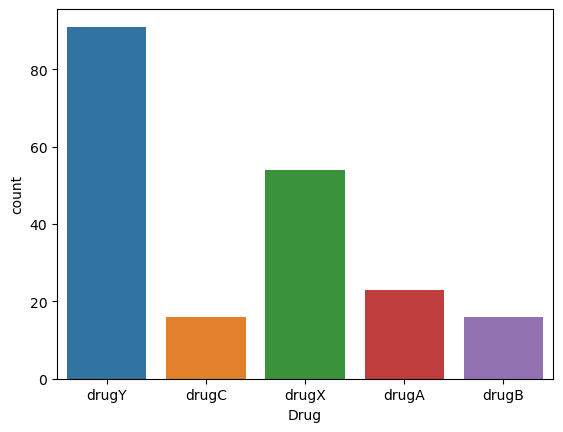

In [20]:
sns.countplot(data=data, x = "Drug")

<Axes: xlabel='Sex', ylabel='count'>

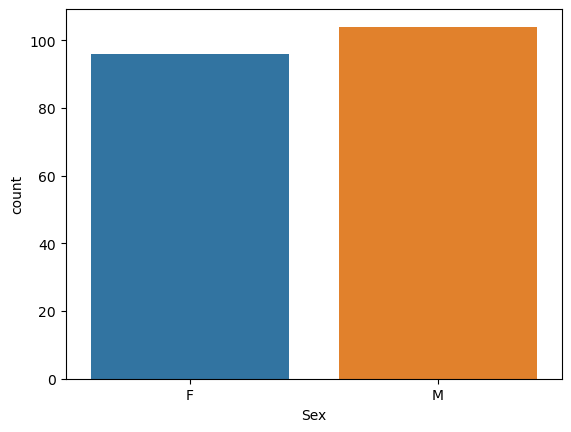

In [21]:
sns.countplot(data=data, x = "Sex")

<Axes: xlabel='BP', ylabel='count'>

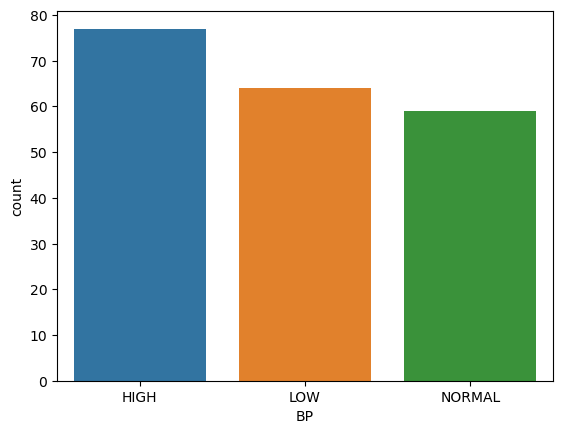

In [22]:
sns.countplot(data=data, x = "BP")

<Axes: xlabel='Cholesterol', ylabel='count'>

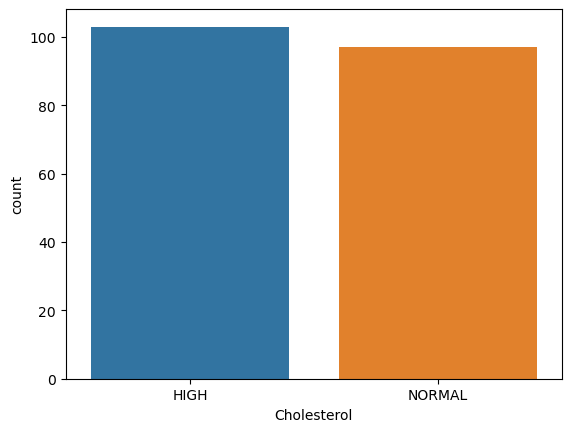

In [23]:
sns.countplot(data=data, x = "Cholesterol")

<Axes: xlabel='Drug', ylabel='count'>

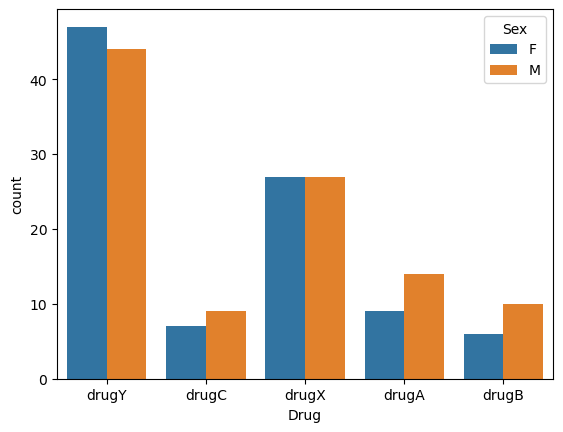

In [24]:
sns.countplot(data=data, x = "Drug", hue="Sex")

In [ ]:
# From above we can see that Drug A and B are only consumed by High BP Patients

<Axes: xlabel='Drug', ylabel='count'>

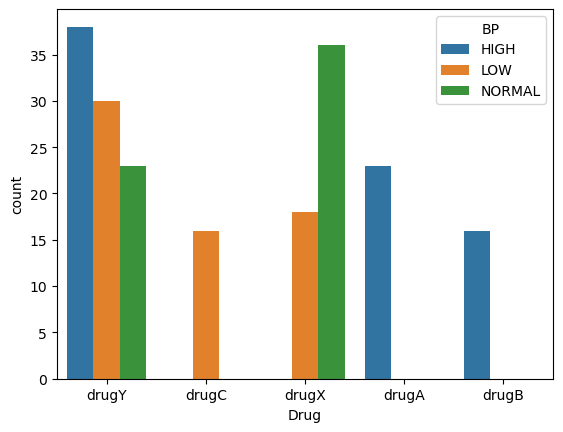

In [25]:
sns.countplot(data=data, x = "Drug", hue="BP")

<Axes: xlabel='Drug', ylabel='count'>

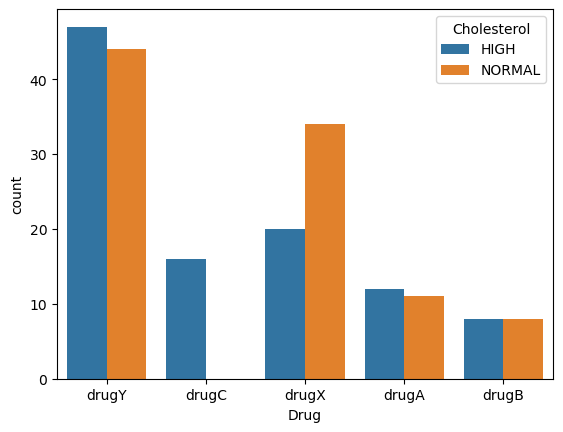

In [26]:
sns.countplot(data=data, x = "Drug", hue="Cholesterol")

In [ ]:
# From above we can see that Drug C is only consumed by High Cholesterol Patients

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\1762649460.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Drug"]=="drugX"]["Na_to_K"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na_to_K', ylabel='Density'>

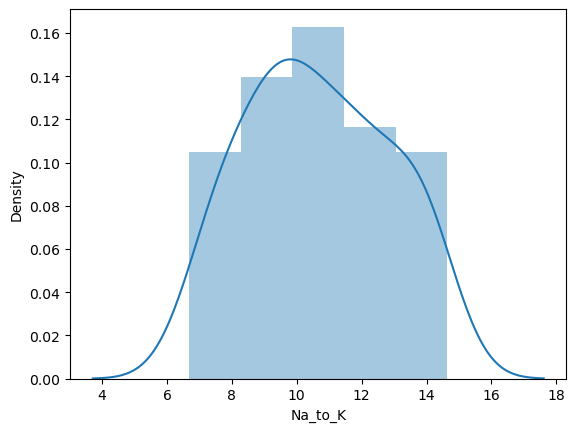

In [27]:
# DISTPLOT

sns.distplot(data[data["Drug"]=="drugX"]["Na_to_K"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\4213680710.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Drug"]=="drugY"]["Na_to_K"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na_to_K', ylabel='Density'>

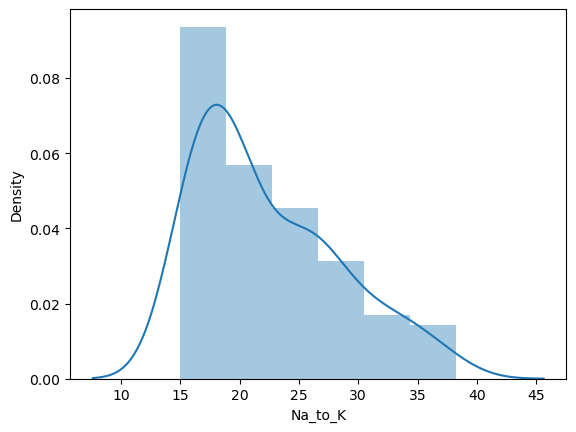

In [28]:
sns.distplot(data[data["Drug"]=="drugY"]["Na_to_K"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\1766981566.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Drug"]=="drugA"]["Na_to_K"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na_to_K', ylabel='Density'>

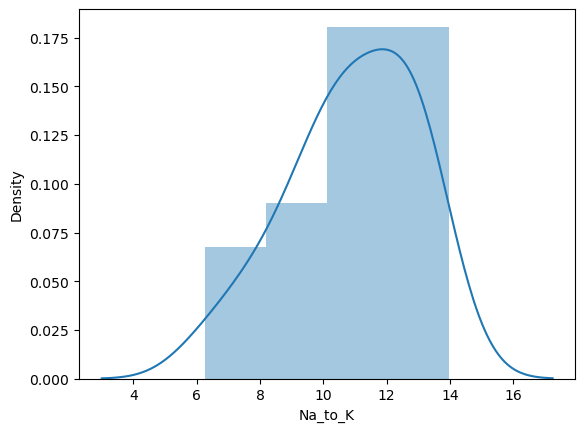

In [29]:
sns.distplot(data[data["Drug"]=="drugA"]["Na_to_K"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\1056816923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Drug"]=="drugB"]["Na_to_K"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na_to_K', ylabel='Density'>

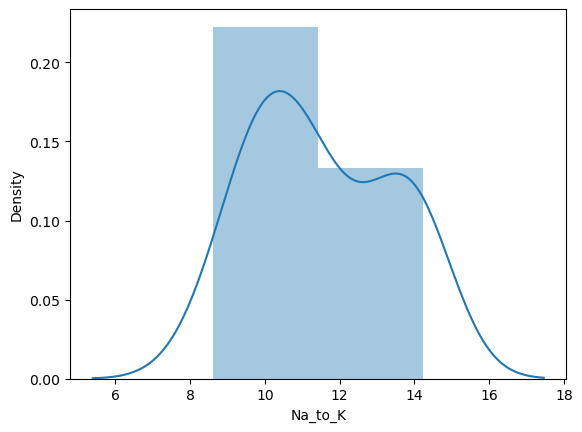

In [30]:
sns.distplot(data[data["Drug"]=="drugB"]["Na_to_K"])

C:\Users\Admin\AppData\Local\Temp\ipykernel_12076\3105397947.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data["Drug"]=="drugC"]["Na_to_K"])
C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Na_to_K', ylabel='Density'>

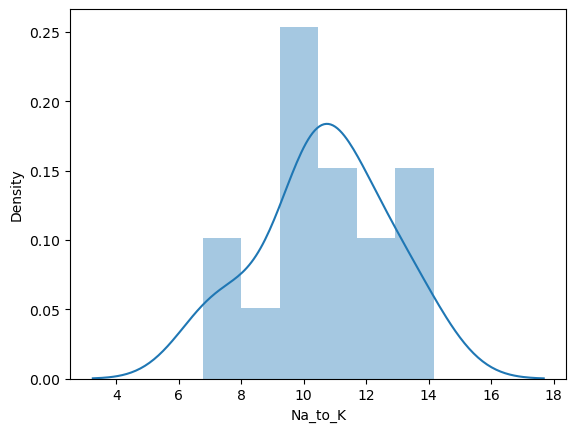

In [31]:
sns.distplot(data[data["Drug"]=="drugC"]["Na_to_K"])

<Axes: xlabel='Drug', ylabel='BP'>

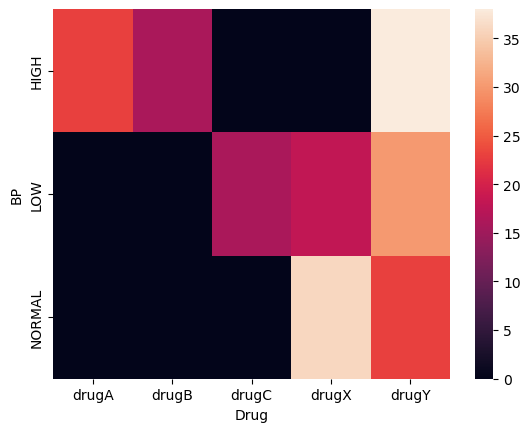

In [32]:

# HEATMAP


sns.heatmap(pd.crosstab(data["BP"], data["Drug"]))

<Axes: xlabel='Drug', ylabel='Cholesterol'>

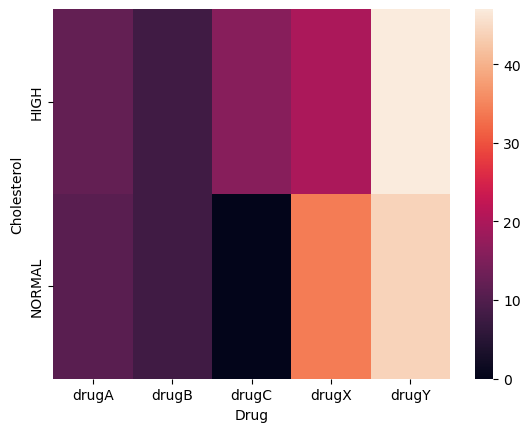

In [33]:
sns.heatmap(pd.crosstab(data["Cholesterol"], data["Drug"]))

<Axes: xlabel='Drug', ylabel='Sex'>

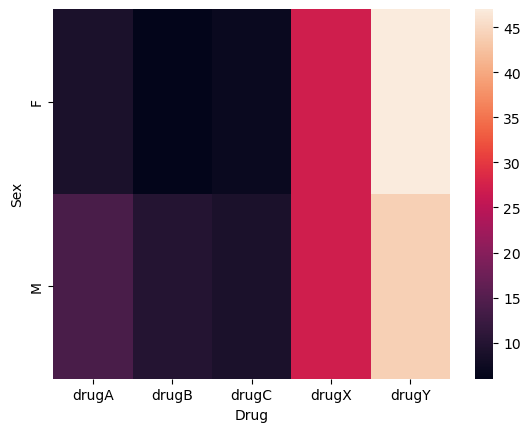

In [34]:
sns.heatmap(pd.crosstab(data["Sex"], data["Drug"]))

In [ ]:
# Feature Encoding

 # Label Encioding the Independent Values One Hot Encoding the Dependent Value

In [35]:
# Label Encoding

le = LabelEncoder()
data["Sex"] = le.fit_transform(data[["Sex"]])
data["BP"] = le.fit_transform(data[["BP"]])
data["Cholesterol"] = le.fit_transform(data[["Cholesterol"]])

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY


In [ ]:
 # Sex: -----> 0 =Female 1 = Male
 # BP: -----> 0 = High 1 = Low 2 = Normal
 # Cholesterol: -----> 0 = High 1 = Normal

In [37]:
 # One Hot Encoding

ohe = OneHotEncoder()
ohe_df = pd.DataFrame(ohe.fit_transform(data[["Drug"]]).toarray(), columns = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"])

In [38]:
final_data = data.join(ohe_df, how="left")

In [39]:
final_data.drop(["Drug"], axis=1, inplace=True)

In [40]:
# Train Test Split

final_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'DrugA', 'DrugB', 'DrugC',
       'DrugX', 'DrugY'],
      dtype='object')

In [41]:
X = final_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
Y = final_data[["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.25, shuffle=True, random_state=42)


In [ ]:
# Decision Tree

In [44]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.625, 0.9, 'x[4] <= 14.829\ngini = 0.278\nsamples = 150\nvalue = [[133, 17]\n[138, 12]\n[138, 12]\n[109, 41]\n[82, 68]]'),
 Text(0.5, 0.7, 'x[2] <= 0.5\ngini = 0.266\nsamples = 82\nvalue = [[65, 17]\n[70, 12]\n[70, 12]\n[41, 41]\n[82, 0]]'),
 Text(0.25, 0.5, 'x[0] <= 51.5\ngini = 0.194\nsamples = 29\nvalue = [[12, 17]\n[17, 12]\n[29, 0]\n[29, 0]\n[29, 0]]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [[0, 17]\n[17, 0]\n[17, 0]\n[17, 0]\n[17, 0]]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.5, 'x[2] <= 1.5\ngini = 0.14\nsamples = 53\nvalue = [[53, 0]\n[53, 0]\n[41, 12]\n[12, 41]\n[53, 0]]'),
 Text(0.625, 0.3, 'x[3] <= 0.5\ngini = 0.199\nsamples = 26\nvalue = [[26, 0]\n[26, 0]\n[14, 12]\n[12, 14]\n[26, 0]]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 12\nvalue = [[12, 0]\n[12, 0]\n[0, 12]\n[12, 0]\n[12, 0]]'),
 Text(0.75, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [[14, 0]\n[14, 0]\n[14, 0]\n[0, 14]\n[14

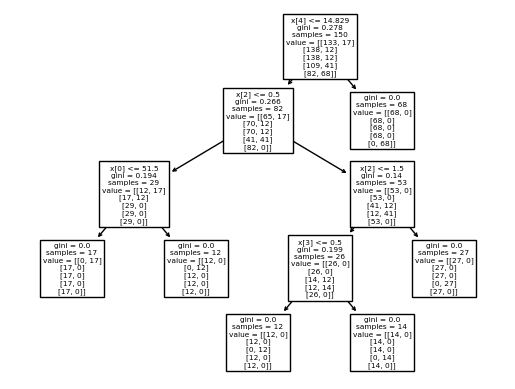

In [45]:
plot_tree(dt)

In [ ]:
# Metrics

In [46]:
cm = multilabel_confusion_matrix(y_test, dt.predict(x_test))
cm

array([[[43,  1],
        [ 0,  6]],

       [[46,  0],
        [ 1,  3]],

       [[46,  0],
        [ 0,  4]],

       [[37,  0],
        [ 0, 13]],

       [[27,  0],
        [ 0, 23]]], dtype=int64)

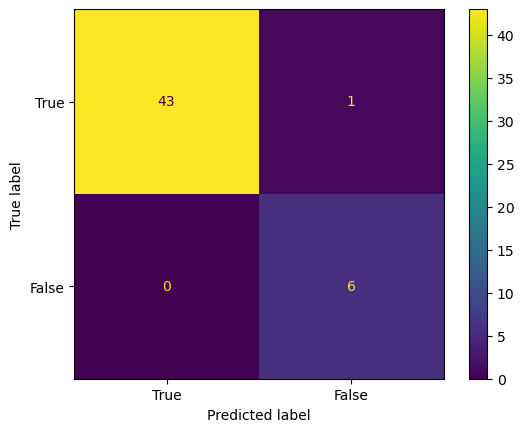

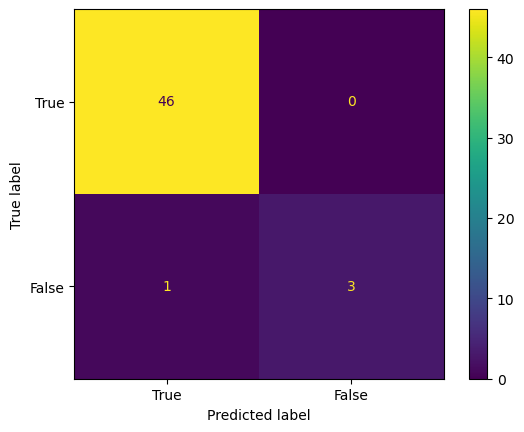

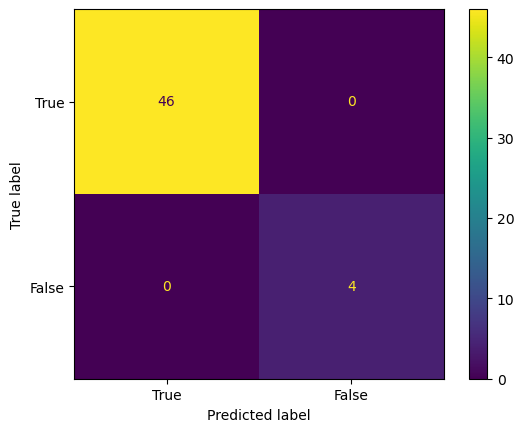

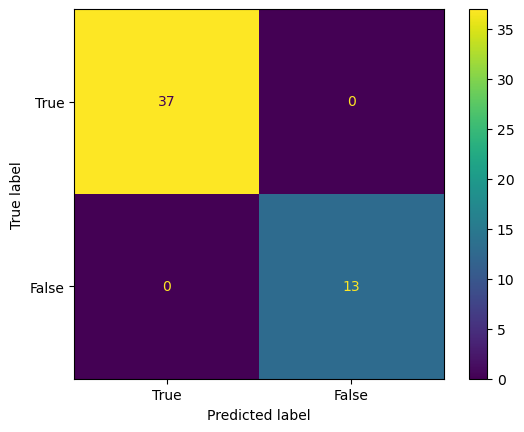

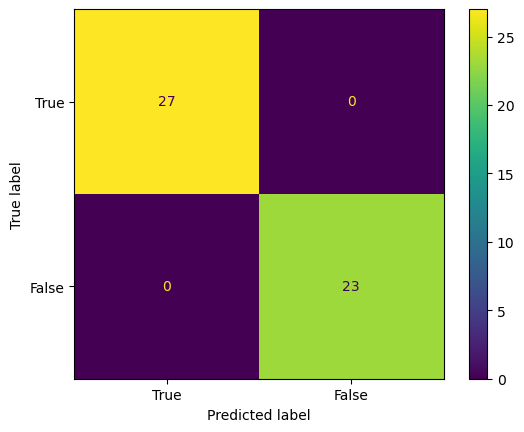

In [47]:
for i in cm:
    cmd = ConfusionMatrixDisplay(confusion_matrix=i, display_labels=["True", "False"])
    cmd.plot()

In [48]:
report = classification_report(y_test, dt.predict(x_test))

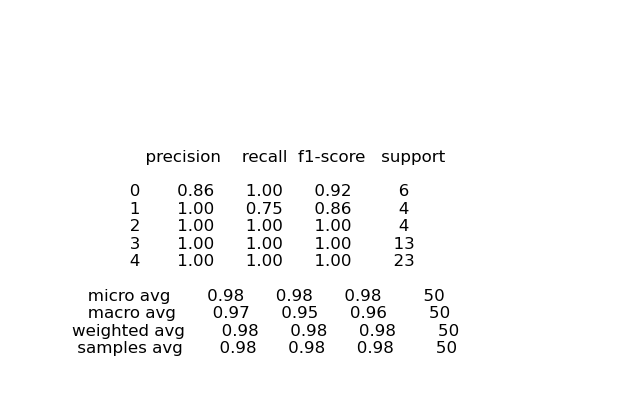

In [49]:
plt.figure(figsize=(8, len(report.split('\n'))*0.4))  # Adjust the height as needed
plt.text(0.1, 0.1, report, fontdict={"fontsize": 12})  # Adjust fontsize and fontfamily as needed
plt.axis('off')  # Hide the axis
plt.show()

In [50]:
accuracy_score(y_test, dt.predict(x_test))

0.98